In [2]:
import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.linear_model import RANSACRegressor, LinearRegression,TheilSenRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error,mean_squared_error, median_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import seaborn
from IPython.display import Image

In [6]:
data = pd.read_excel('Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
data.columns = ['cement_component', 'furnace_slag', 'flay_ash',
'water_component', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_strength']

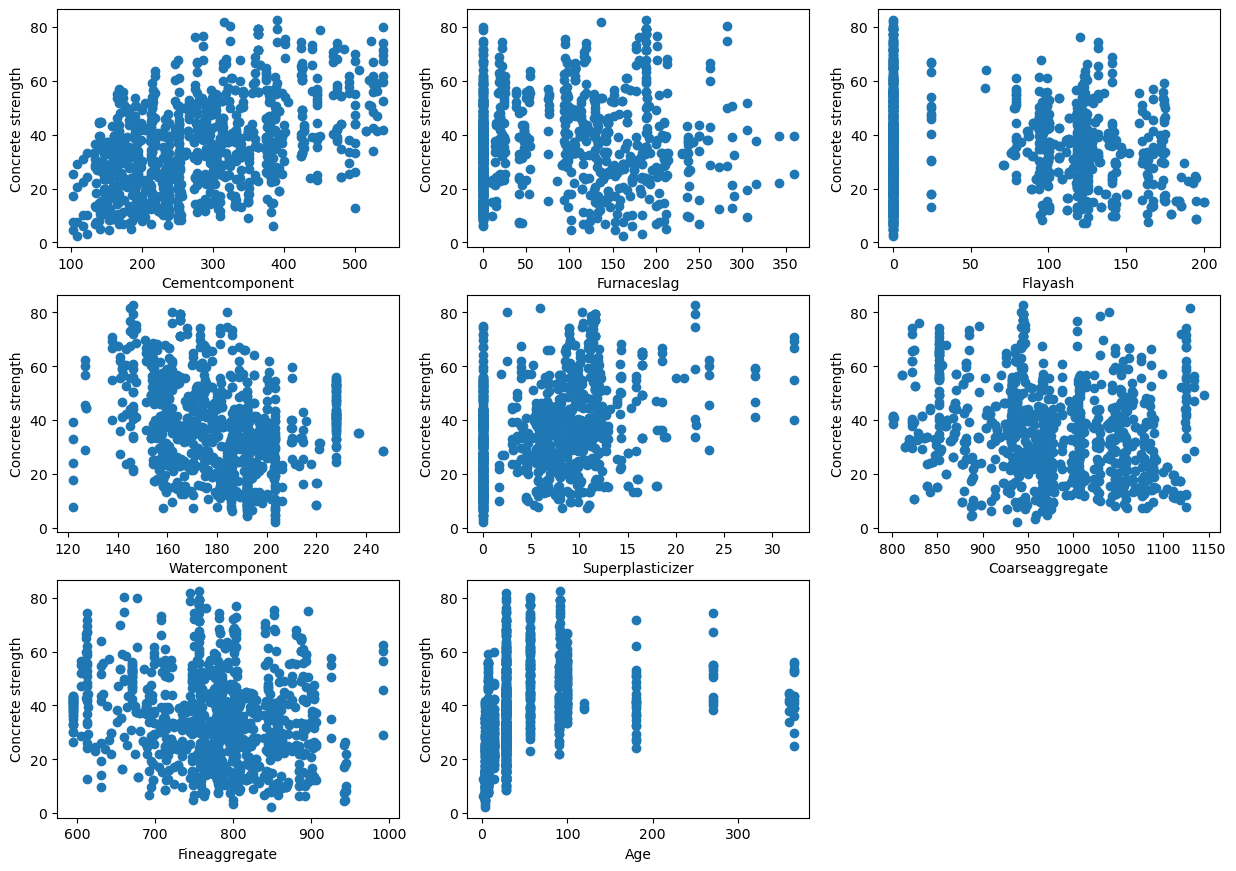

In [9]:
#Plotting Scatter Plots Between the Response and Exploratory Variables
plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(data.columns)[:-1]:
    plt.subplot(3, 3, plot_count)
    plt.scatter(data[feature], data['concrete_strength'])
    plt.xlabel(feature.replace('_','').title())
    plt.ylabel('Concrete strength')
    plot_count += 1
    
plt.show()

In [10]:
pd.set_option('display.width',100)
pd.set_option('precision',3)
correlations = data.corr(method='pearson')
print(correlations)

OptionError: 'Pattern matched multiple keys'

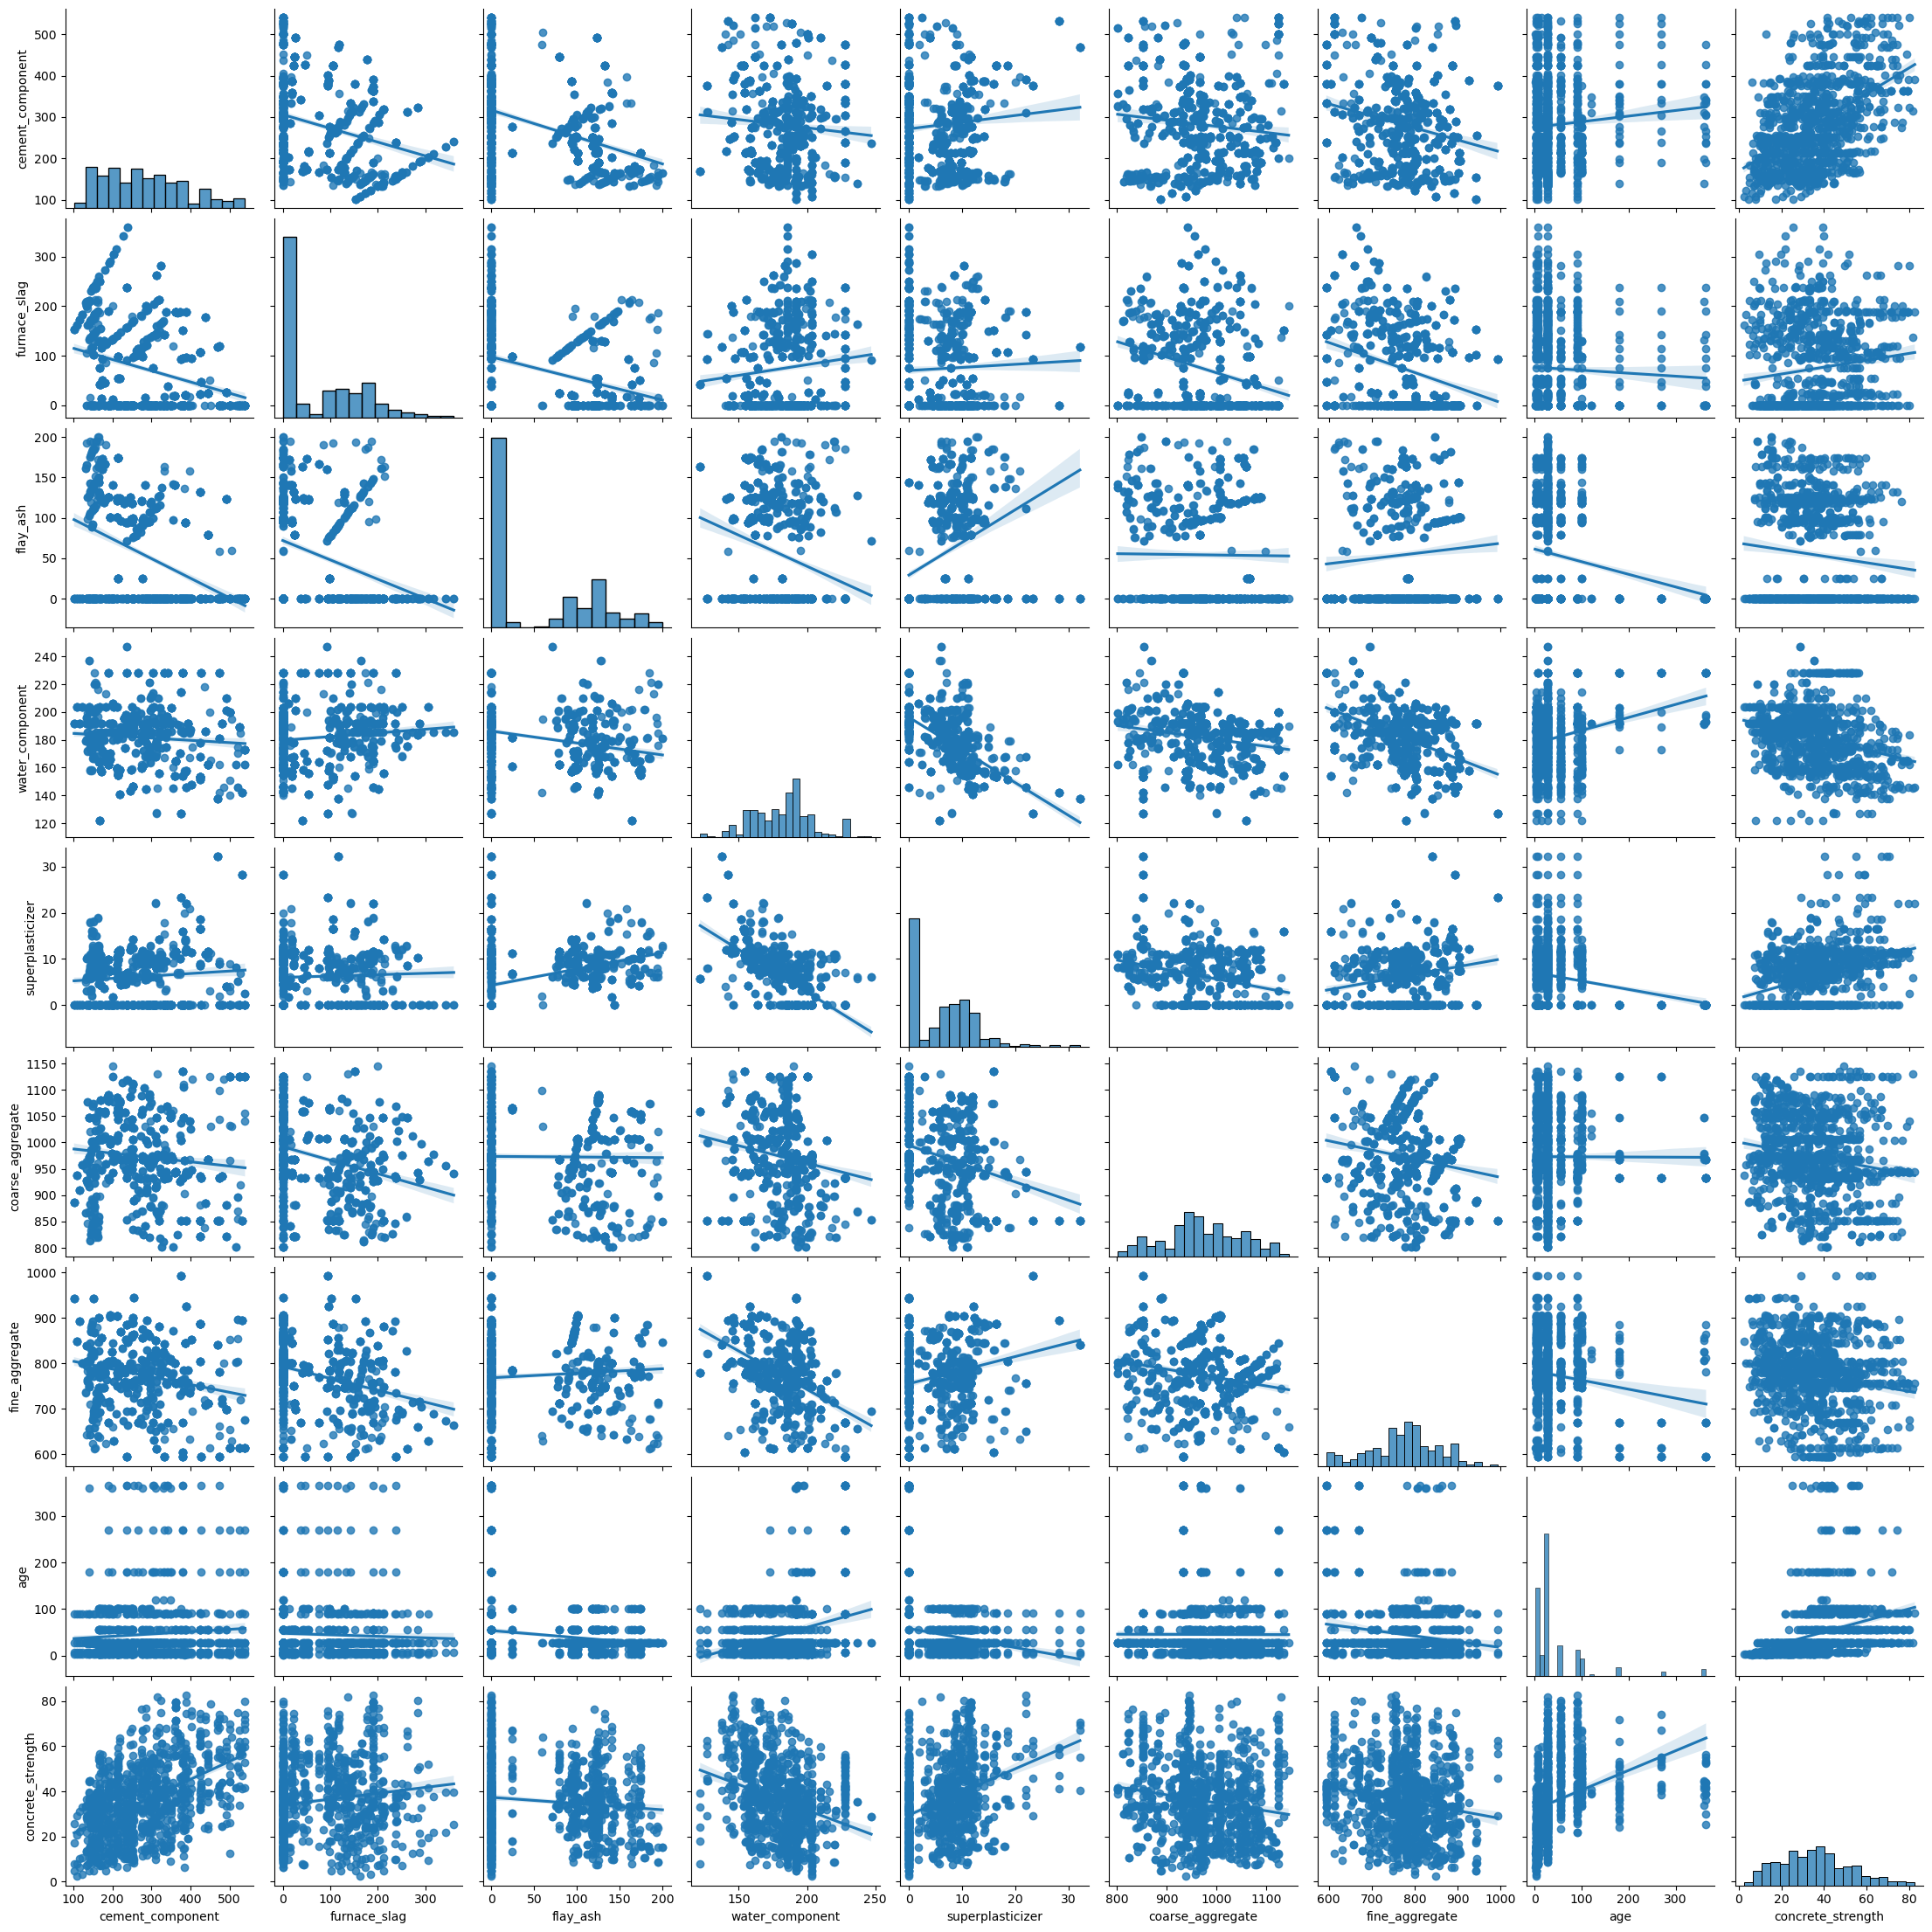

In [12]:
data_ = data[(data.T !=0).any()]
seaborn.pairplot(data_, vars = data.columns, kind='reg')
plt.show()

In [13]:
def split_train_test(data, feature, train_index=0.7):
    train, test = train_test_split(data, test_size = 1 - train_index)
    if type(feature) == list:
        x_train = train[feature].as_matrix()
        y_train = train['concrete_strength'].as_matrix()
        
        x_test = test[feature].as_matrix()
        y_test = test['concrete_strength'].as_matrix()
    else:
        x_train = [[x] for x in list(train[feature])]
        y_train = [[x] for x in list(train['concrete_strength'])]
        x_test = [[x] for x in list(test[feature])]
        y_test = [[x] for x in list(test['concrete_strength'])]
    return x_train, y_train, x_test, y_test
    

Smith decided to give it a shot and try to identify the regression models suitable
for the size of the current dataset. He recalled having said: “As in our case, the number
of samples is less than 100K, hence the potential models are Lasso, ElasticNet,
SVR(kernel=‘rbf’), Ensemble Regressors, Ridge Regression, and SVR(kernel=‘linear’).”
Linear regression is the most basic of the regression models to start with, and hence
Claire decided to start modeling from it.
Linear Regression
Smith already knew what a linear regression was, thanks to Claire (see Figure 2-2). Hence
Claire decided to put it into the application to see how it performs, so she compiled the
code in Listing 2-9.

In [26]:
plt.figure(figsize=(15, 7))
plot_count = 1

for feature in ['cement_component','flay_ash','water_component',
               'superplasticizer','coarse_aggregate']:
    data_tr = data[['concrete_strength', feature]]
    daa_tr = data_tr[(data_tr.T != 0).all()]
    
    x_train = split_train_test(data_tr, feature)
    y_train = split_train_test(data_tr, feature)
    x_test = split_train_test(data_tr, feature)
    y_test = split_train_test(data_tr, feature)
    #Create linear regression object
    regr = LinearRegression()

    #Train the model using the training sets
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)

    #Plot outputs
    plt.subplot(2, 3, plot_count)
    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Concrete strength')
    print(feature, r2_score(y_test, y_pred))
    plot_count += 1
plot.show()

ValueError: This LinearRegression estimator requires y to be passed, but the target y is None.

<Figure size 1500x700 with 0 Axes>

In [27]:
features = ['cement_component', 'flay_ash', 'water_component',
'superplasticizer', 'coarse_aggregate']
data_tr = data
data_tr=data_tr[(data_tr.T != 0).all()]
x_train = split_train_test(data_tr, feature)
y_train = split_train_test(data_tr, feature)
x_test = split_train_test(data_tr, feature)
y_test = split_train_test(data_tr, feature)
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
plt.scatter(range(len(y_test)), y_test,  color='black')
plt.plot(y_pred, color='blue', linewidth=3)

ValueError: This LinearRegression estimator requires y to be passed, but the target y is None.

In [18]:
alphas = np.arange(0.1,5,0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
y_pred = cv.fit(x_train, y_train).predict(x_test)
plt.scatter(range(len(y_test)), y_test,  color='black')
plt.plot(y_pred, color='blue', linewidth=3)

NameError: name 'x_train' is not defined

In [28]:
feature = 'cement_component'
cc_new_data = [213.5]
data_tr = data[['concrete_strength', feature]]
data_tr=data_tr[(data_tr.T != 0).all()]
x_train = split_train_test(data_tr, feature)
y_train = split_train_test(data_tr, feature)
x_test = split_train_test(data_tr, feature)
y_test = split_train_test(data_tr, feature)
regr = GradientBoostingRegressor()
# Train the model using the training sets
regr.fit(x_train, y_train)
cs_pred = regr.predict(cc_new_data)
print('Predicted value of concrete strength: %f'%cs_pred)

ValueError: This GradientBoostingRegressor estimator requires y to be passed, but the target y is None.